In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import multivelo as mv
import matplotlib.pyplot as plt
import anndata

#note here scvelo=0.2.3 and matplotlib=3.3.0, python=3.8, anndata=0.7.5, scanpy=1.5, numpy=1.17 and python=3.8 environment

In [2]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

## First reading out Velocyto outputs and subsetting based on cells used in Seurat object and matching cell ids

In [3]:
d4_rna=scv.read("./input/Day4_model.loom", cache=True)
d6_rna=scv.read("./input/Day6_model.loom", cache=True)
d8_rna=scv.read("./input/Day8_model.loom", cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
d4_rna.obs_names = [x.split(':')[1][:-1] + '-1' for x in d4_rna.obs_names]
d4_rna.obs.index=d4_rna.obs_names
d6_rna.obs_names = [x.split(':')[1][:-1] + '-1' for x in d6_rna.obs_names]
d6_rna.obs.index=d6_rna.obs_names
d8_rna.obs_names = [x.split(':')[1][:-1] + '-1' for x in d8_rna.obs_names]
d8_rna.obs.index=d8_rna.obs_names

In [5]:
d4_meta=pd.read_csv("./input/d4_meta.csv", index_col=0)
d6_meta=pd.read_csv("./input/d6_meta.csv", index_col=0)
d8_meta=pd.read_csv("./input/d8_meta.csv", index_col=0)

In [6]:
d4_rna=d4_rna[d4_meta.index,]
d4_rna.obs=d4_meta
d4_rna

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 783 × 36601
    obs: 'seurat_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'sample_type', 'nCount_peaks', 'nFeature_peaks', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'nCount_GeneActivity', 'nFeature_GeneActivity', 'scmap_nakamura', 'scmapCELL_nakamura', 'scmap_Yang', 'scmapCELL_Yang', 'scmap_ma', 'scmapCELL_ma', 'cell_assignment', 'course_cell_assignment', 'scmap_Tyser', 'scmapCELL_Tyser', 'scmap_Mole', 'scmapCELL_Mole', 'PGC_Module1', 'cell_assignment2', 'AME_pseudotime', 'EXMC_pseudotime', 'total_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [7]:
d6_rna=d6_rna[d6_meta.index,]
d6_rna.obs=d6_meta
d6_rna

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 2124 × 36601
    obs: 'seurat_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'sample_type', 'nCount_peaks', 'nFeature_peaks', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'nCount_GeneActivity', 'nFeature_GeneActivity', 'scmap_nakamura', 'scmapCELL_nakamura', 'scmap_Yang', 'scmapCELL_Yang', 'scmap_ma', 'scmapCELL_ma', 'cell_assignment', 'course_cell_assignment', 'scmap_Tyser', 'scmapCELL_Tyser', 'scmap_Mole', 'scmapCELL_Mole', 'PGC_Module1', 'cell_assignment2', 'AME_pseudotime', 'EXMC_pseudotime', 'total_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [8]:
d8_rna=d8_rna[d8_meta.index,]
d8_rna.obs=d8_meta
d8_rna

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 2310 × 36601
    obs: 'seurat_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'sample_type', 'nCount_peaks', 'nFeature_peaks', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'nCount_GeneActivity', 'nFeature_GeneActivity', 'scmap_nakamura', 'scmapCELL_nakamura', 'scmap_Yang', 'scmapCELL_Yang', 'scmap_ma', 'scmapCELL_ma', 'cell_assignment', 'course_cell_assignment', 'scmap_Tyser', 'scmapCELL_Tyser', 'scmap_Mole', 'scmapCELL_Mole', 'PGC_Module1', 'cell_assignment2', 'AME_pseudotime', 'EXMC_pseudotime', 'total_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [9]:
d4_rna.obs.index=d4_rna.obs['seurat_id'].values
d6_rna.obs.index=d6_rna.obs['seurat_id'].values
d8_rna.obs.index=d8_rna.obs['seurat_id'].values

In [10]:
d4_rna.obs['barcode']=[x.split('_')[2] for x in d4_rna.obs_names]
d6_rna.obs['barcode']=[x.split('_')[2] for x in d6_rna.obs_names]
d8_rna.obs['barcode']=[x.split('_')[2] for x in d8_rna.obs_names]

In [11]:
d4_rna.var_names_make_unique()
d6_rna.var_names_make_unique()
d8_rna.var_names_make_unique()

In [12]:
adata_rna=anndata.concat([d4_rna, d6_rna, d8_rna], join='outer')

In [13]:
umap_embeddings=pd.read_csv("/mnt/d/human_model/wnn_umap_embeddings.csv", index_col=0)
adata_rna.obsm["X_umap"]=umap_embeddings.values

... storing 'sample_type' as categorical
... storing 'doublet' as categorical
... storing 'Phase' as categorical
... storing 'scmap_nakamura' as categorical
... storing 'scmapCELL_nakamura' as categorical
... storing 'scmap_Yang' as categorical
... storing 'scmapCELL_Yang' as categorical
... storing 'scmap_ma' as categorical
... storing 'scmapCELL_ma' as categorical
... storing 'cell_assignment' as categorical
... storing 'course_cell_assignment' as categorical
... storing 'scmap_Tyser' as categorical
... storing 'scmapCELL_Tyser' as categorical
... storing 'scmap_Mole' as categorical
... storing 'scmapCELL_Mole' as categorical
... storing 'cell_assignment2' as categorical
... storing 'barcode' as categorical


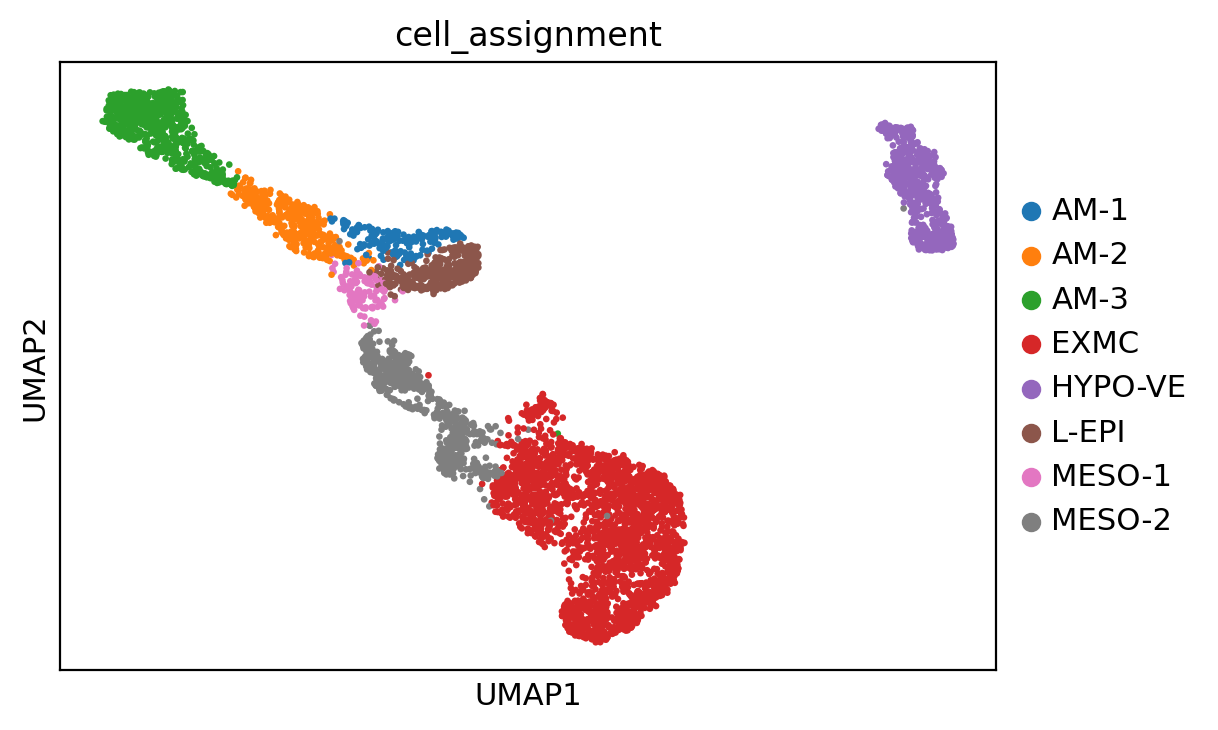

In [14]:
sc.pl.umap(adata_rna, color='cell_assignment')

In [15]:
# Top 1000 variable genes are used for downstream analyses.
scv.pp.filter_and_normalize(adata_rna, min_shared_counts=10, n_top_genes=1000)

Filtered out 24500 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.


In [16]:
adata_rna.write("./objs/adata_rna_1000genes.h5ad")

## Now importing ATAC data, and filtering to cells including from Seurat/Siganc analysis and matching cell ids

In [ ]:
d4_atac = sc.read_10x_mtx('/mnt/f/human_model/outs/Day4_model/outs/filtered_feature_bc_matrix/', var_names='gene_symbols', cache=True, gex_only=False)
d4_atac = d4_atac[:,d4_atac.var['feature_types'] == "Peaks"]
d6_atac = sc.read_10x_mtx('/mnt/f/human_model/outs/Day6_model/outs/filtered_feature_bc_matrix/', var_names='gene_symbols', cache=True, gex_only=False)
d6_atac = d6_atac[:,d6_atac.var['feature_types'] == "Peaks"]
d8_atac = sc.read_10x_mtx('/mnt/f/human_model/outs/Day8_model/outs/filtered_feature_bc_matrix/', var_names='gene_symbols', cache=True, gex_only=False)
d8_atac = d8_atac[:,d8_atac.var['feature_types'] == "Peaks"]

In [ ]:
d4_meta.index=d4_meta['barcode']
d6_meta.index=d6_meta['barcode']
d8_meta.index=d8_meta['barcode']

d4_atac=d4_atac[d4_meta.index,]
d6_atac=d6_atac[d6_meta.index,]
d8_atac=d8_atac[d8_meta.index,]

In [ ]:
d4_atac.obs=d4_meta
d6_atac.obs=d6_meta
d8_atac.obs=d8_meta

In [ ]:
d4_atac.obs.index=d4_atac.obs['seurat_id'].values
d6_atac.obs.index=d6_atac.obs['seurat_id'].values
d8_atac.obs.index=d8_atac.obs['seurat_id'].values

In [ ]:
# We aggregate peaks around each gene as well as those that have high correlations with promoter peak or gene expression.
# Peak annotation contains the metadata for all peaks.
# Feature linkage contains pairs of correlated genomic features.
d4_atac = mv.aggregate_peaks_10x(d4_atac,
                                    '/mnt/f/human_model/outs/Day4_model/outs/atac_peak_annotation.tsv',
                                    '/mnt/f/human_model/outs/Day4_model/outs/analysis/feature_linkage/feature_linkage.bedpe',
                                    verbose=True)
d6_atac = mv.aggregate_peaks_10x(d6_atac,
                                    '/mnt/f/human_model/outs/Day6_model/outs/atac_peak_annotation.tsv',
                                    '/mnt/f/human_model/outs/Day6_model/outs/analysis/feature_linkage/feature_linkage.bedpe',
                                    verbose=True)
d8_atac = mv.aggregate_peaks_10x(d8_atac,
                                    '/mnt/f/human_model/outs/Day8_model/outs/atac_peak_annotation.tsv',
                                    '/mnt/f/human_model/outs/Day8_model/outs/analysis/feature_linkage/feature_linkage.bedpe',
                                    verbose=True)

In [ ]:
adata_atac=anndata.concat([d4_atac, d6_atac, d8_atac], join='outer')

In [ ]:
plt.hist(adata_atac.X.sum(1), bins=100, range=(0, 100000));

In [ ]:
# We normalize aggregated peaks with TF-IDF.
mv.tfidf_norm(adata_atac)

In [ ]:
adata_rna.write("./objs/adata_atac.h5ad")

### Now running multivelo analysis based on https://multivelo.readthedocs.io/en/latest/MultiVelo_Demo.html

In [17]:
adata_rna=sc.read_h5ad('./objs/adata_rna_1000genes.h5ad')
adata_atac=sc.read_h5ad('./objs/adata_atac.h5ad')

In [18]:
#All cells should be shared given subset based on pre-filtered seurat/siganc cells previously
shared_cells = pd.Index(np.intersect1d(adata_rna.obs_names, adata_atac.obs_names))
shared_genes = pd.Index(np.intersect1d(adata_rna.var_names, adata_atac.var_names))
len(shared_cells), len(shared_genes)

(5217, 1000)

In [19]:
adata_rna = adata_rna[shared_cells, shared_genes]
adata_atac = adata_atac[shared_cells, shared_genes]

In [20]:
scv.pp.normalize_per_cell(adata_rna, enforce=True)
scv.pp.log1p(adata_rna)
scv.pp.moments(adata_rna, n_pcs=30, n_neighbors=50)

Trying to set attribute `.obs` of view, copying.


Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [21]:
adata_rna.obs['cell_assignment'] = adata_rna.obs['cell_assignment'].astype('category')

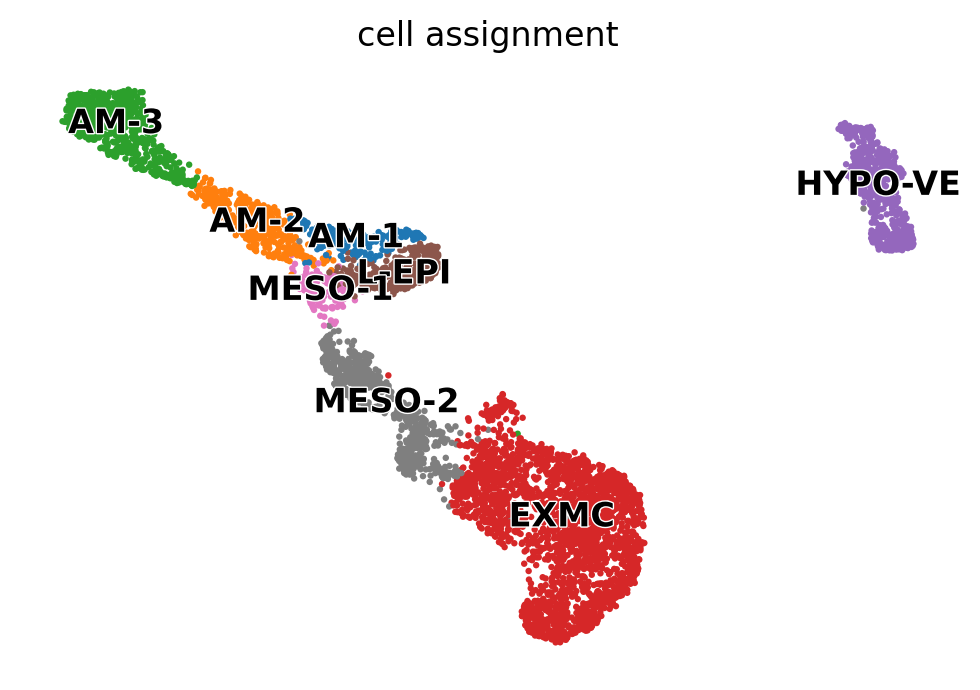

In [22]:
scv.pl.umap(adata_rna, color='cell_assignment')

In [23]:
# Read in Seurat WNN neighbors.
nn_idx = np.loadtxt("./input/nn_idx.txt", delimiter=',')
nn_dist = np.loadtxt("./input/nn_dist.txt", delimiter=',')
nn_cells = pd.Index(pd.read_csv("./input/nn_cells.txt", header=None)[0])

# Make sure cell names match.
np.all(nn_cells == adata_atac.obs_names)

True

In [24]:
mv.knn_smooth_chrom(adata_atac, nn_idx, nn_dist)

In [25]:
# This will take a while. Parallelization is highly recommended.
adata_result = mv.recover_dynamics_chrom(adata_rna,
                                         adata_atac,
                                         max_iter=5,
                                         init_mode="invert",
                                         verbose=False,
                                         parallel=True,
                                         save_plot=False,
                                         rna_only=False,
                                         fit=True,
                                         n_anchors=500,
                                         extra_color_key='cell_assignment'
                                        )

  0%|          | 0/1000 [00:00<?, ?it/s]

In [26]:
# Save the result for use later on
adata_result.write("multivelo_result_1000genes_invert.h5ad")

... storing 'fit_direction' as categorical


In [49]:
adata_result = sc.read_h5ad("multivelo_result_1000genes_invert.h5ad")

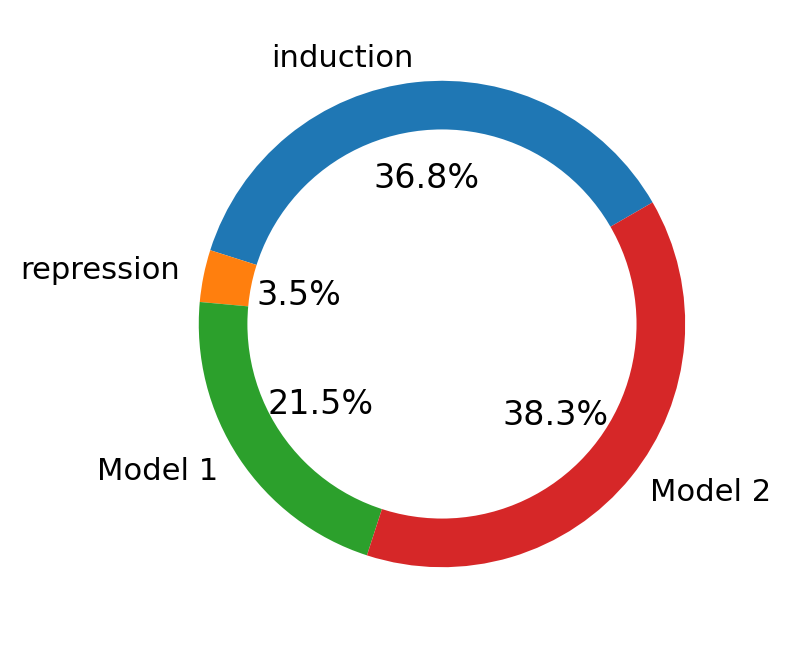

In [50]:
mv.pie_summary(adata_result)

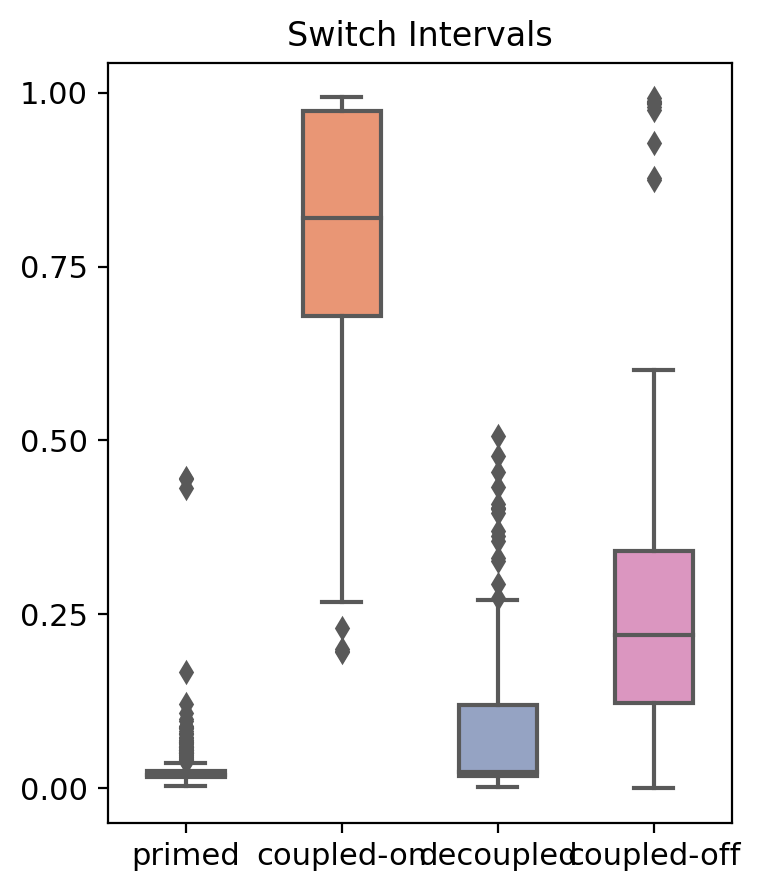

In [28]:
mv.switch_time_summary(adata_result)

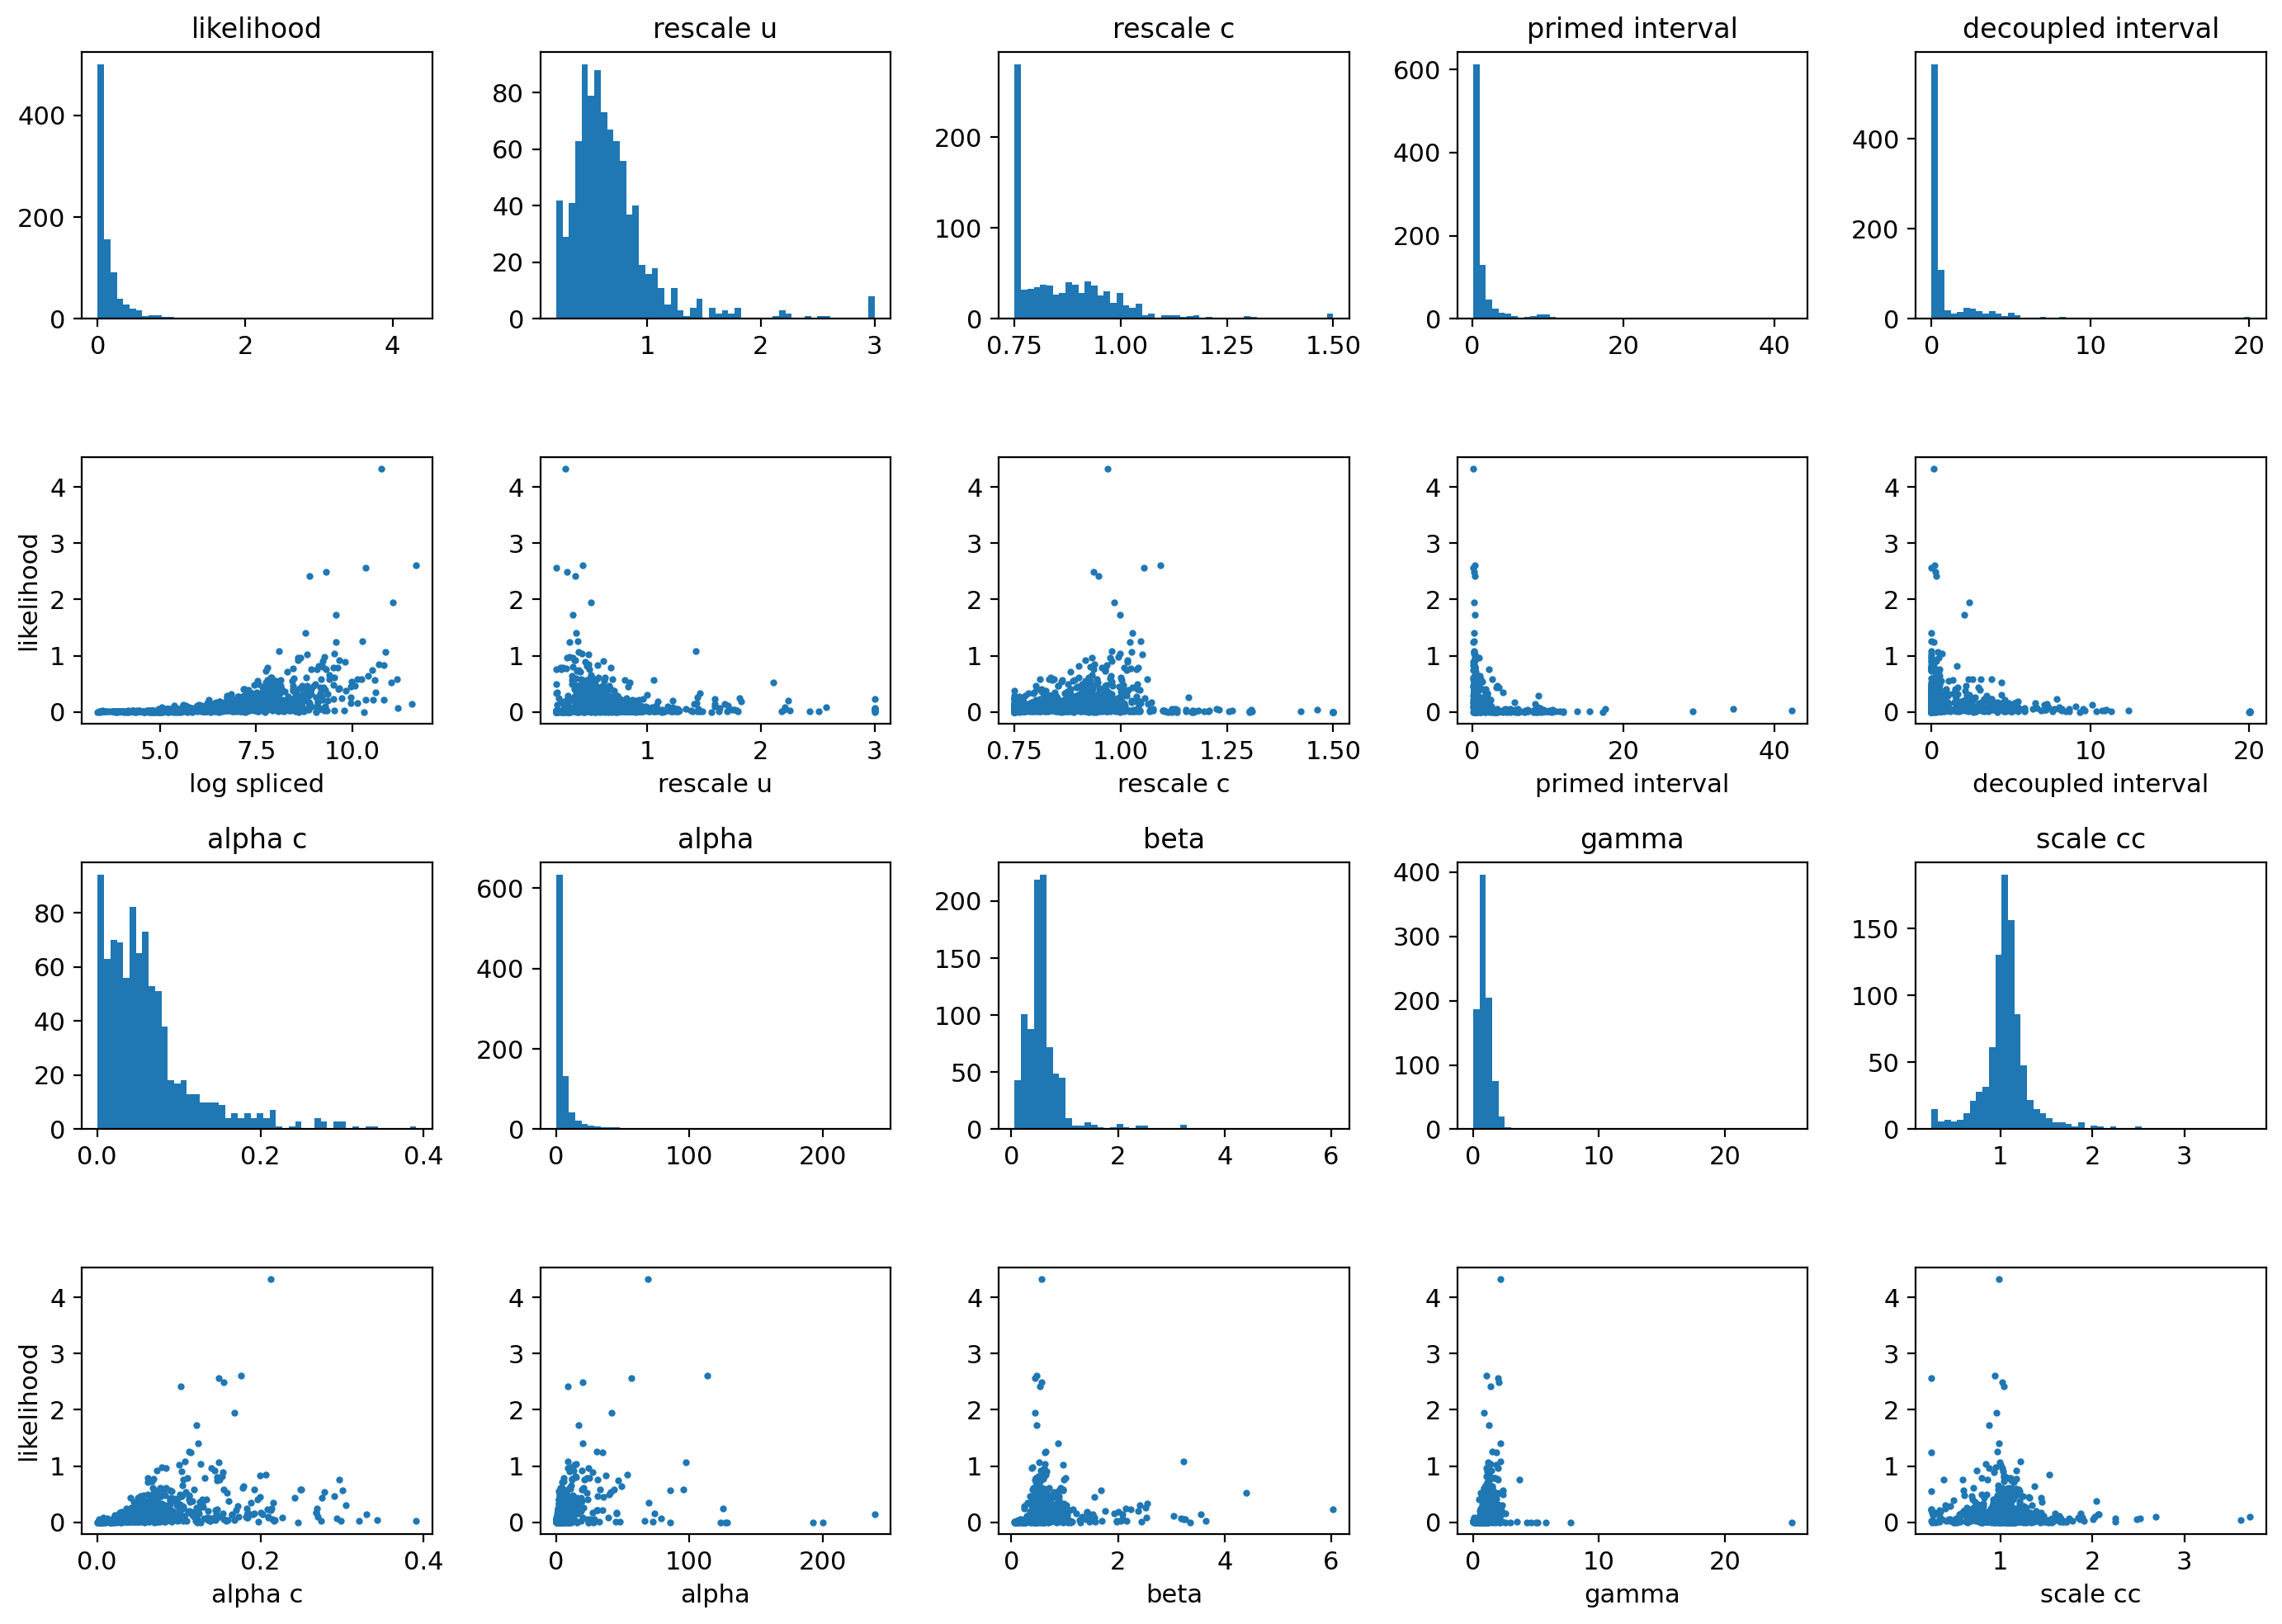

In [29]:
mv.likelihood_plot(adata_result)

In [30]:
adata_result.var

gene_count_corr     means  dispersions  dispersions_norm  \
AASS                 0.0713  0.304356     0.916806          1.789913   
ABCA1               -0.1031  0.398529     0.904776          1.653286   
ABCC2               -0.0229  0.014174     1.497443          3.830013   
ABCG2               -0.0477  0.191338     1.023595          2.151673   
AC002480.1          -0.0139  0.008960     0.735707          1.320611   
...                     ...       ...          ...               ...   
ZNF26               -0.0535  0.086975     1.133755          2.631910   
ZNF335              -0.0588  0.063389     0.734770          1.317525   
ZNF564              -0.0360  0.040798     1.470311          3.740632   
ZNF613              -0.0232  0.019727     0.985554          2.143689   
ZNF852              -0.0353  0.041852     0.885233          1.813197   

            highly_variable  fit_alpha_c  fit_alpha  fit_beta  fit_gamma  \
AASS                   True     0.079831   7.389049  0.708585   1.637512   
ABCA1                  True     0.054762   3.040202  0.697544   1.102403   
ABCC2                  True     0.009829   0.271701  0.257323   0.066417   
ABCG2                  True     0.075934   2.541240  0.561807   0.843913   
AC002480.1             True     0.022325   0.290443  1.578196   0.596567   
...                     ...          ...        ...       ...        ...   
ZNF26                  True     0.009821   1.489176  0.192753   1.393645   
ZNF335                 True     0.008663   0.322305  0.107390   0.148942   
ZNF564                 True     0.004361   1.034808  0.074102   0.779871   
ZNF613                 True     0.007958   0.241920  0.218160   0.066046   
ZNF852                 True     0.005490   0.360137  0.114127   0.138398   

            fit_t_sw1  fit_t_sw2  fit_t_sw3  fit_scale_cc  fit_rescale_c  \
AASS         0.313024  16.533587  16.979562      1.095765       0.844688   
ABCA1       -0.048369  17.331279  17.664987      1.039455       0.885466   
ABCC2        3.714615  20.029827  21.508621      0.307420       0.750000   
ABCG2        0.379499  15.220259  15.605690      0.973044       0.889258   
AC002480.1   0.524835  20.032624  20.492813      1.137582       0.809955   
...               ...        ...        ...           ...            ...   
ZNF26       -0.090299  20.018508  55.185185      1.068806       0.829432   
ZNF335      -0.048575  20.173181  84.347826      1.015944       0.877049   
ZNF564      -0.142690  20.101252  79.830508      1.091298       0.750000   
ZNF613       2.006320  20.003669  22.630385      1.150000       0.750000   
ZNF852      -0.070511  20.125196  57.402597      1.124768       0.866422   

            fit_rescale_u  fit_alignment_scaling  fit_model fit_direction  \
AASS             0.431733               1.438040        1.0      complete   
ABCA1            0.618298               1.494012        2.0      complete   
ABCC2            1.152238               1.075431        1.0            on   
ABCG2            0.595817               1.703072        1.0      complete   
AC002480.1       2.504904               1.024641        1.0            on   
...                   ...                    ...        ...           ...   
ZNF26            0.252878               3.080247        1.0            on   
ZNF335           0.530424               4.339130        1.0            on   
ZNF564           0.235694               4.228814        1.0            on   
ZNF613           1.133988               1.131519        1.0            on   
ZNF852           0.563830               3.240260        1.0            on   

            fit_loss  fit_likelihood  fit_likelihood_c    fit_ssd_c  \
AASS        0.039465        0.125692          0.240456   393.353458   
ABCA1       0.064907        0.137079          0.339525   850.623455   
ABCC2       0.000990        0.014819          0.131758  1051.120075   
ABCG2       0.017655        0.175506          0.318890   435.260269   
AC002480.1  0.000423        0.012836     

### Computing Latent Time and Velocity Stream

In [52]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph
    finished (0:00:03) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 3 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


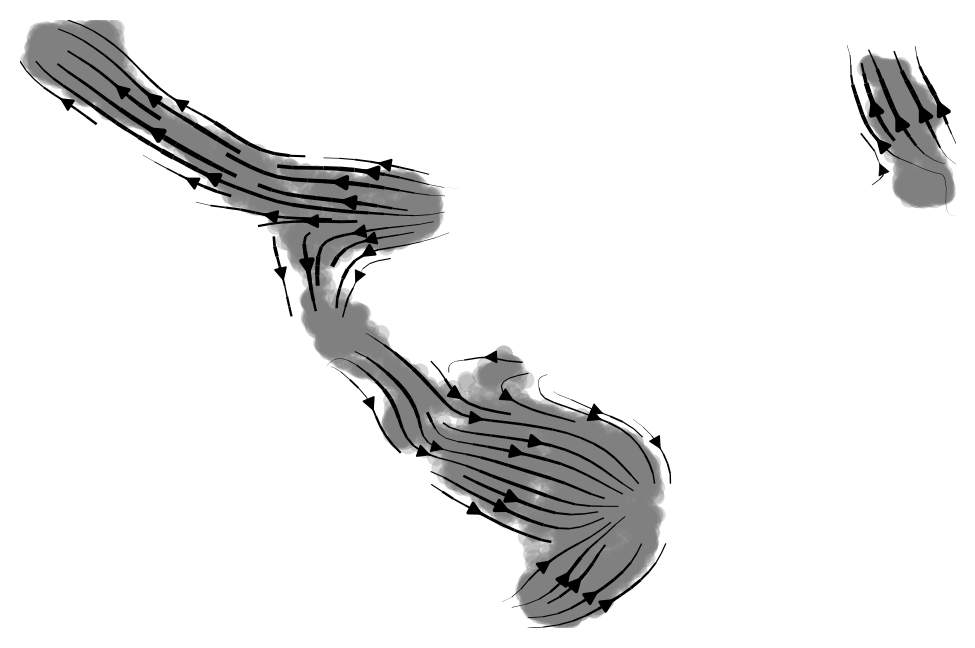

In [53]:
mv.velocity_embedding_stream(adata_result, basis='umap')

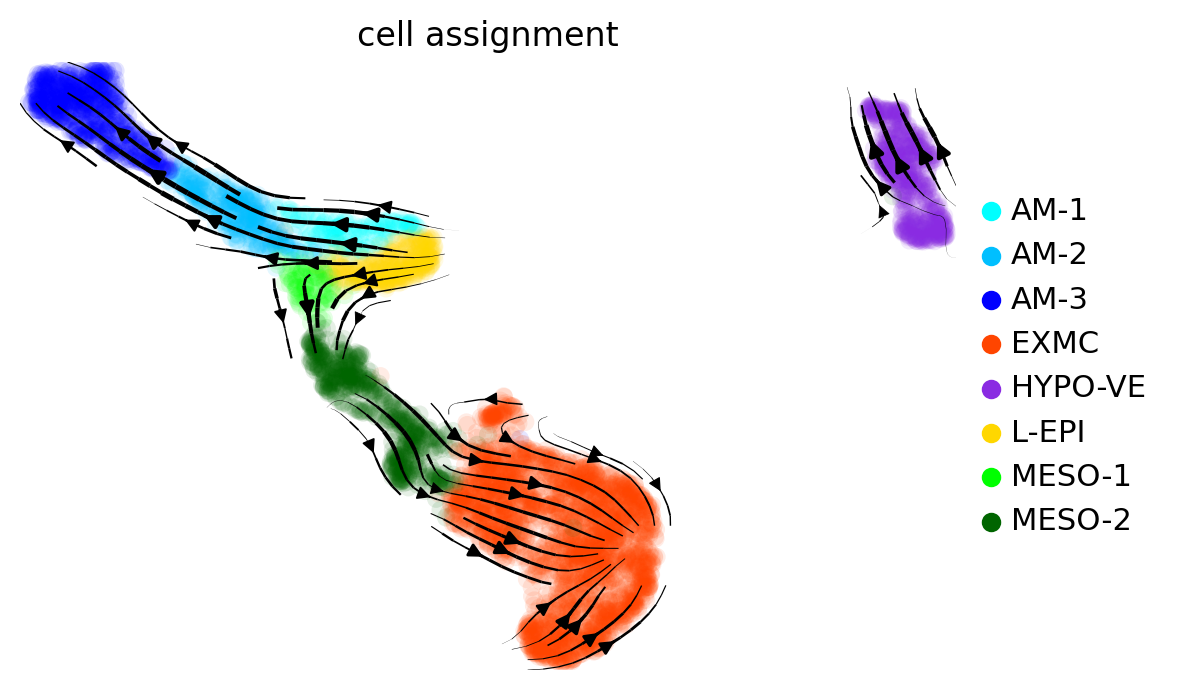

In [98]:
mv.velocity_embedding_stream(adata_result, color='cell_assignment', legend_loc='right_margin', alpha=0.1,
                             palette=("#00FFFF", "#00BFFF", "#0000FF", "#FF4500", "#8A2BE2","#FFD700", "#00FF00", "#006500"), basis='umap')

saving figure to file ./figures/scvelo_umap_out_velocity_stream_5000genes.png


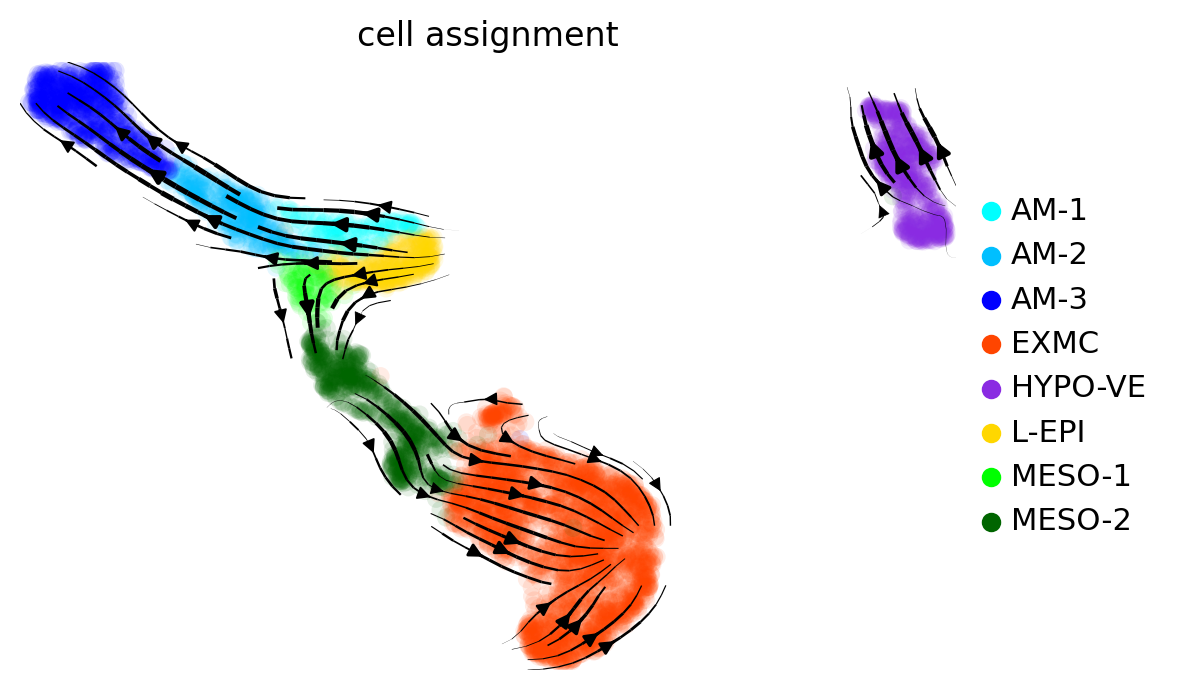

In [39]:
plot=mv.velocity_embedding_stream(adata_result, color='cell_assignment', legend_loc='right_margin', alpha=0.1,
                             palette=("#00FFFF", "#00BFFF", "#0000FF", "#FF4500", "#8A2BE2","#FFD700", "#00FF00", "#006500"), basis='umap',
                                 save="umap_out_velocity_stream_5000genes.png")

saving figure to file ./figures/scvelo_umap_out_latent_time_1000genes.png


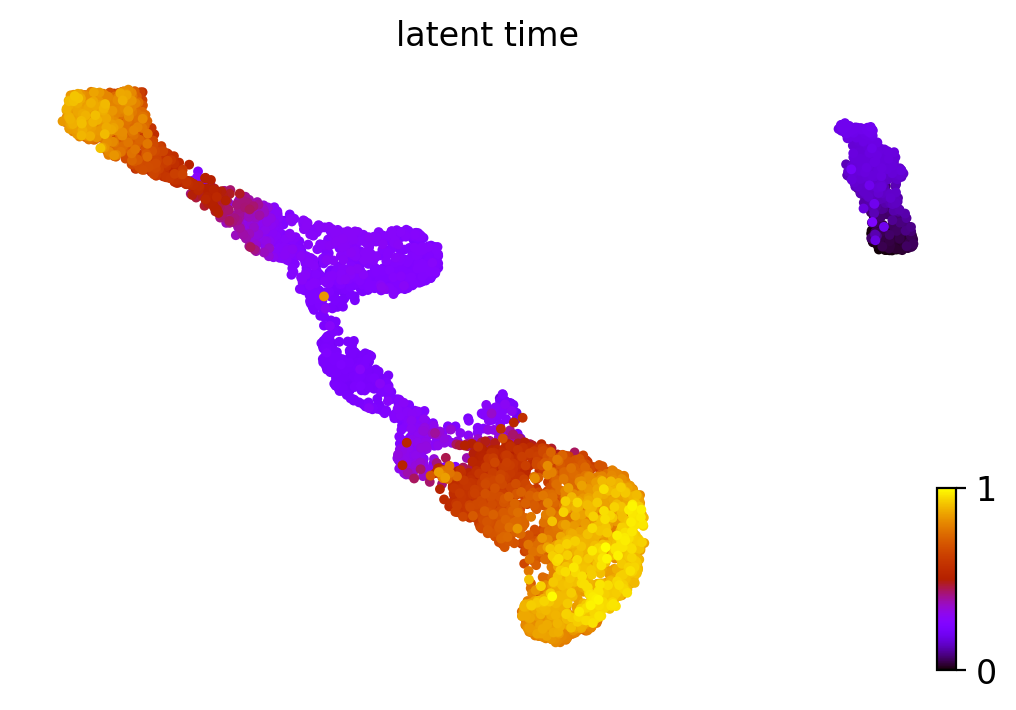

In [55]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=50,
              save='umap_out_latent_time_1000genes.png')

## Examining Gene Dynamics

In [94]:
gene_list = ['ID1', 'VTCN1', 'GATA3', 'TBXT', 'PDGFRA']

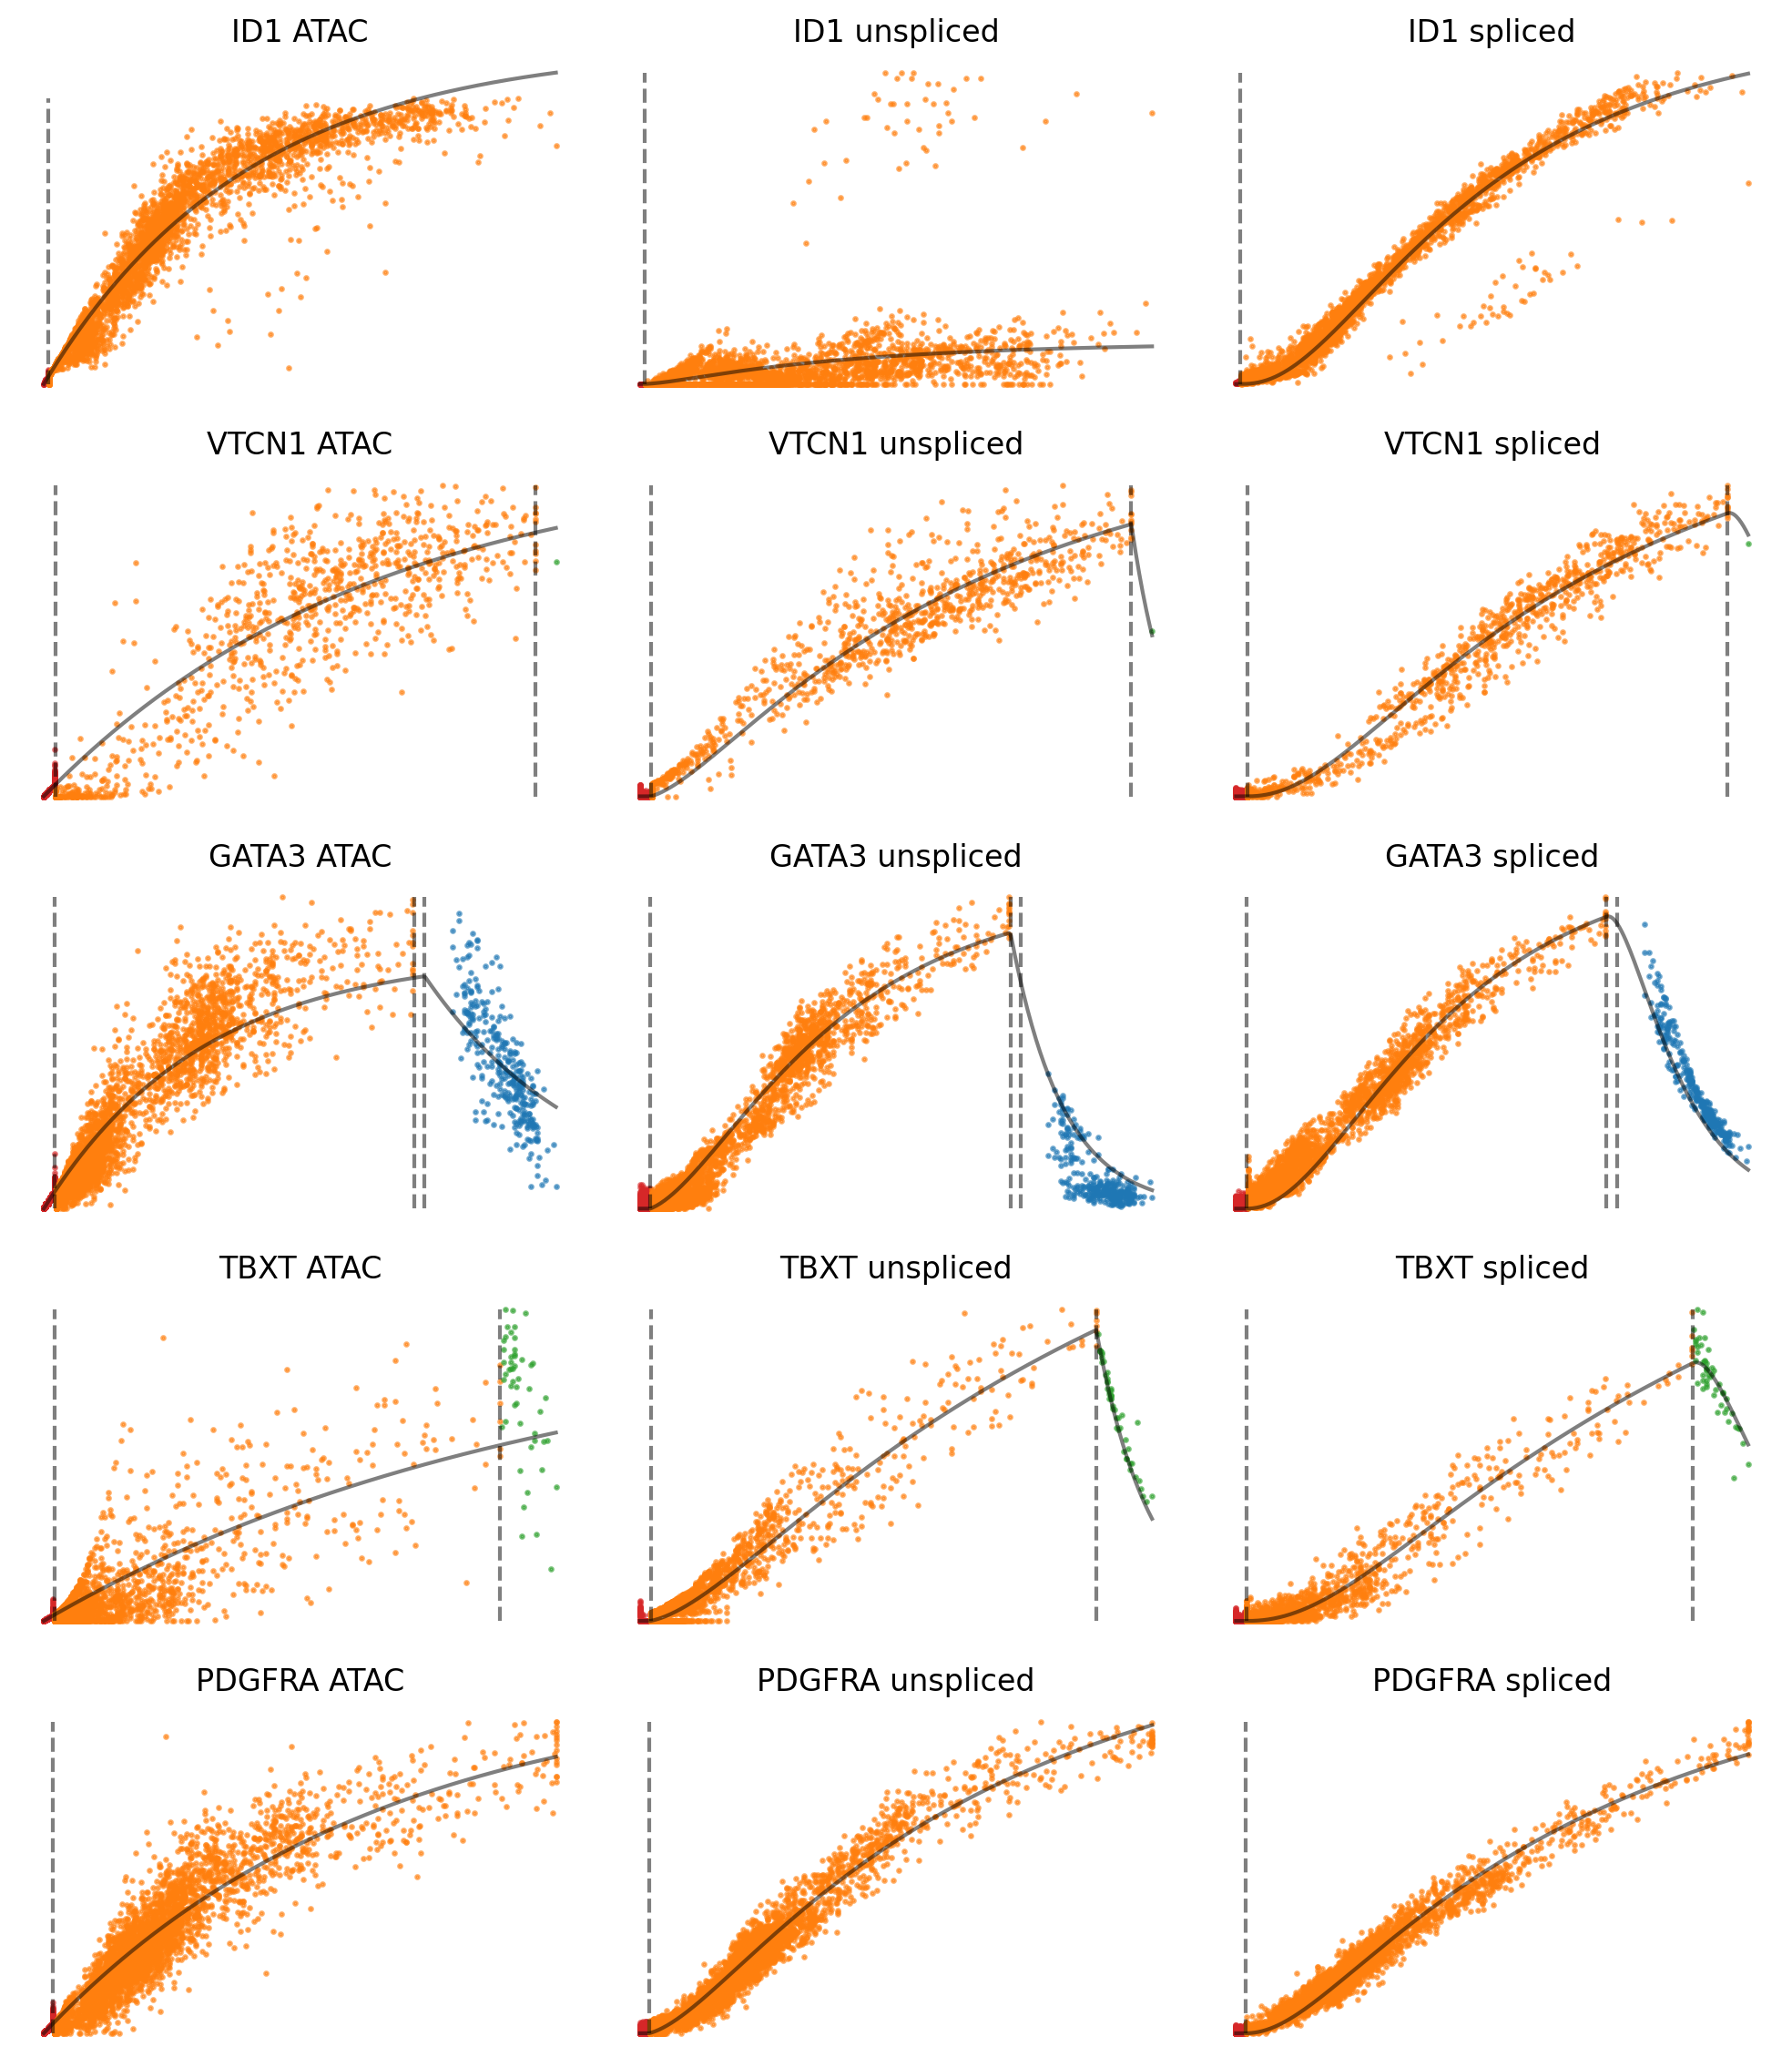

In [95]:
# Accessibility/expression by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
mv.dynamic_plot(adata_result, gene_list, color_by='state', axis_on=False, frame_on=False)

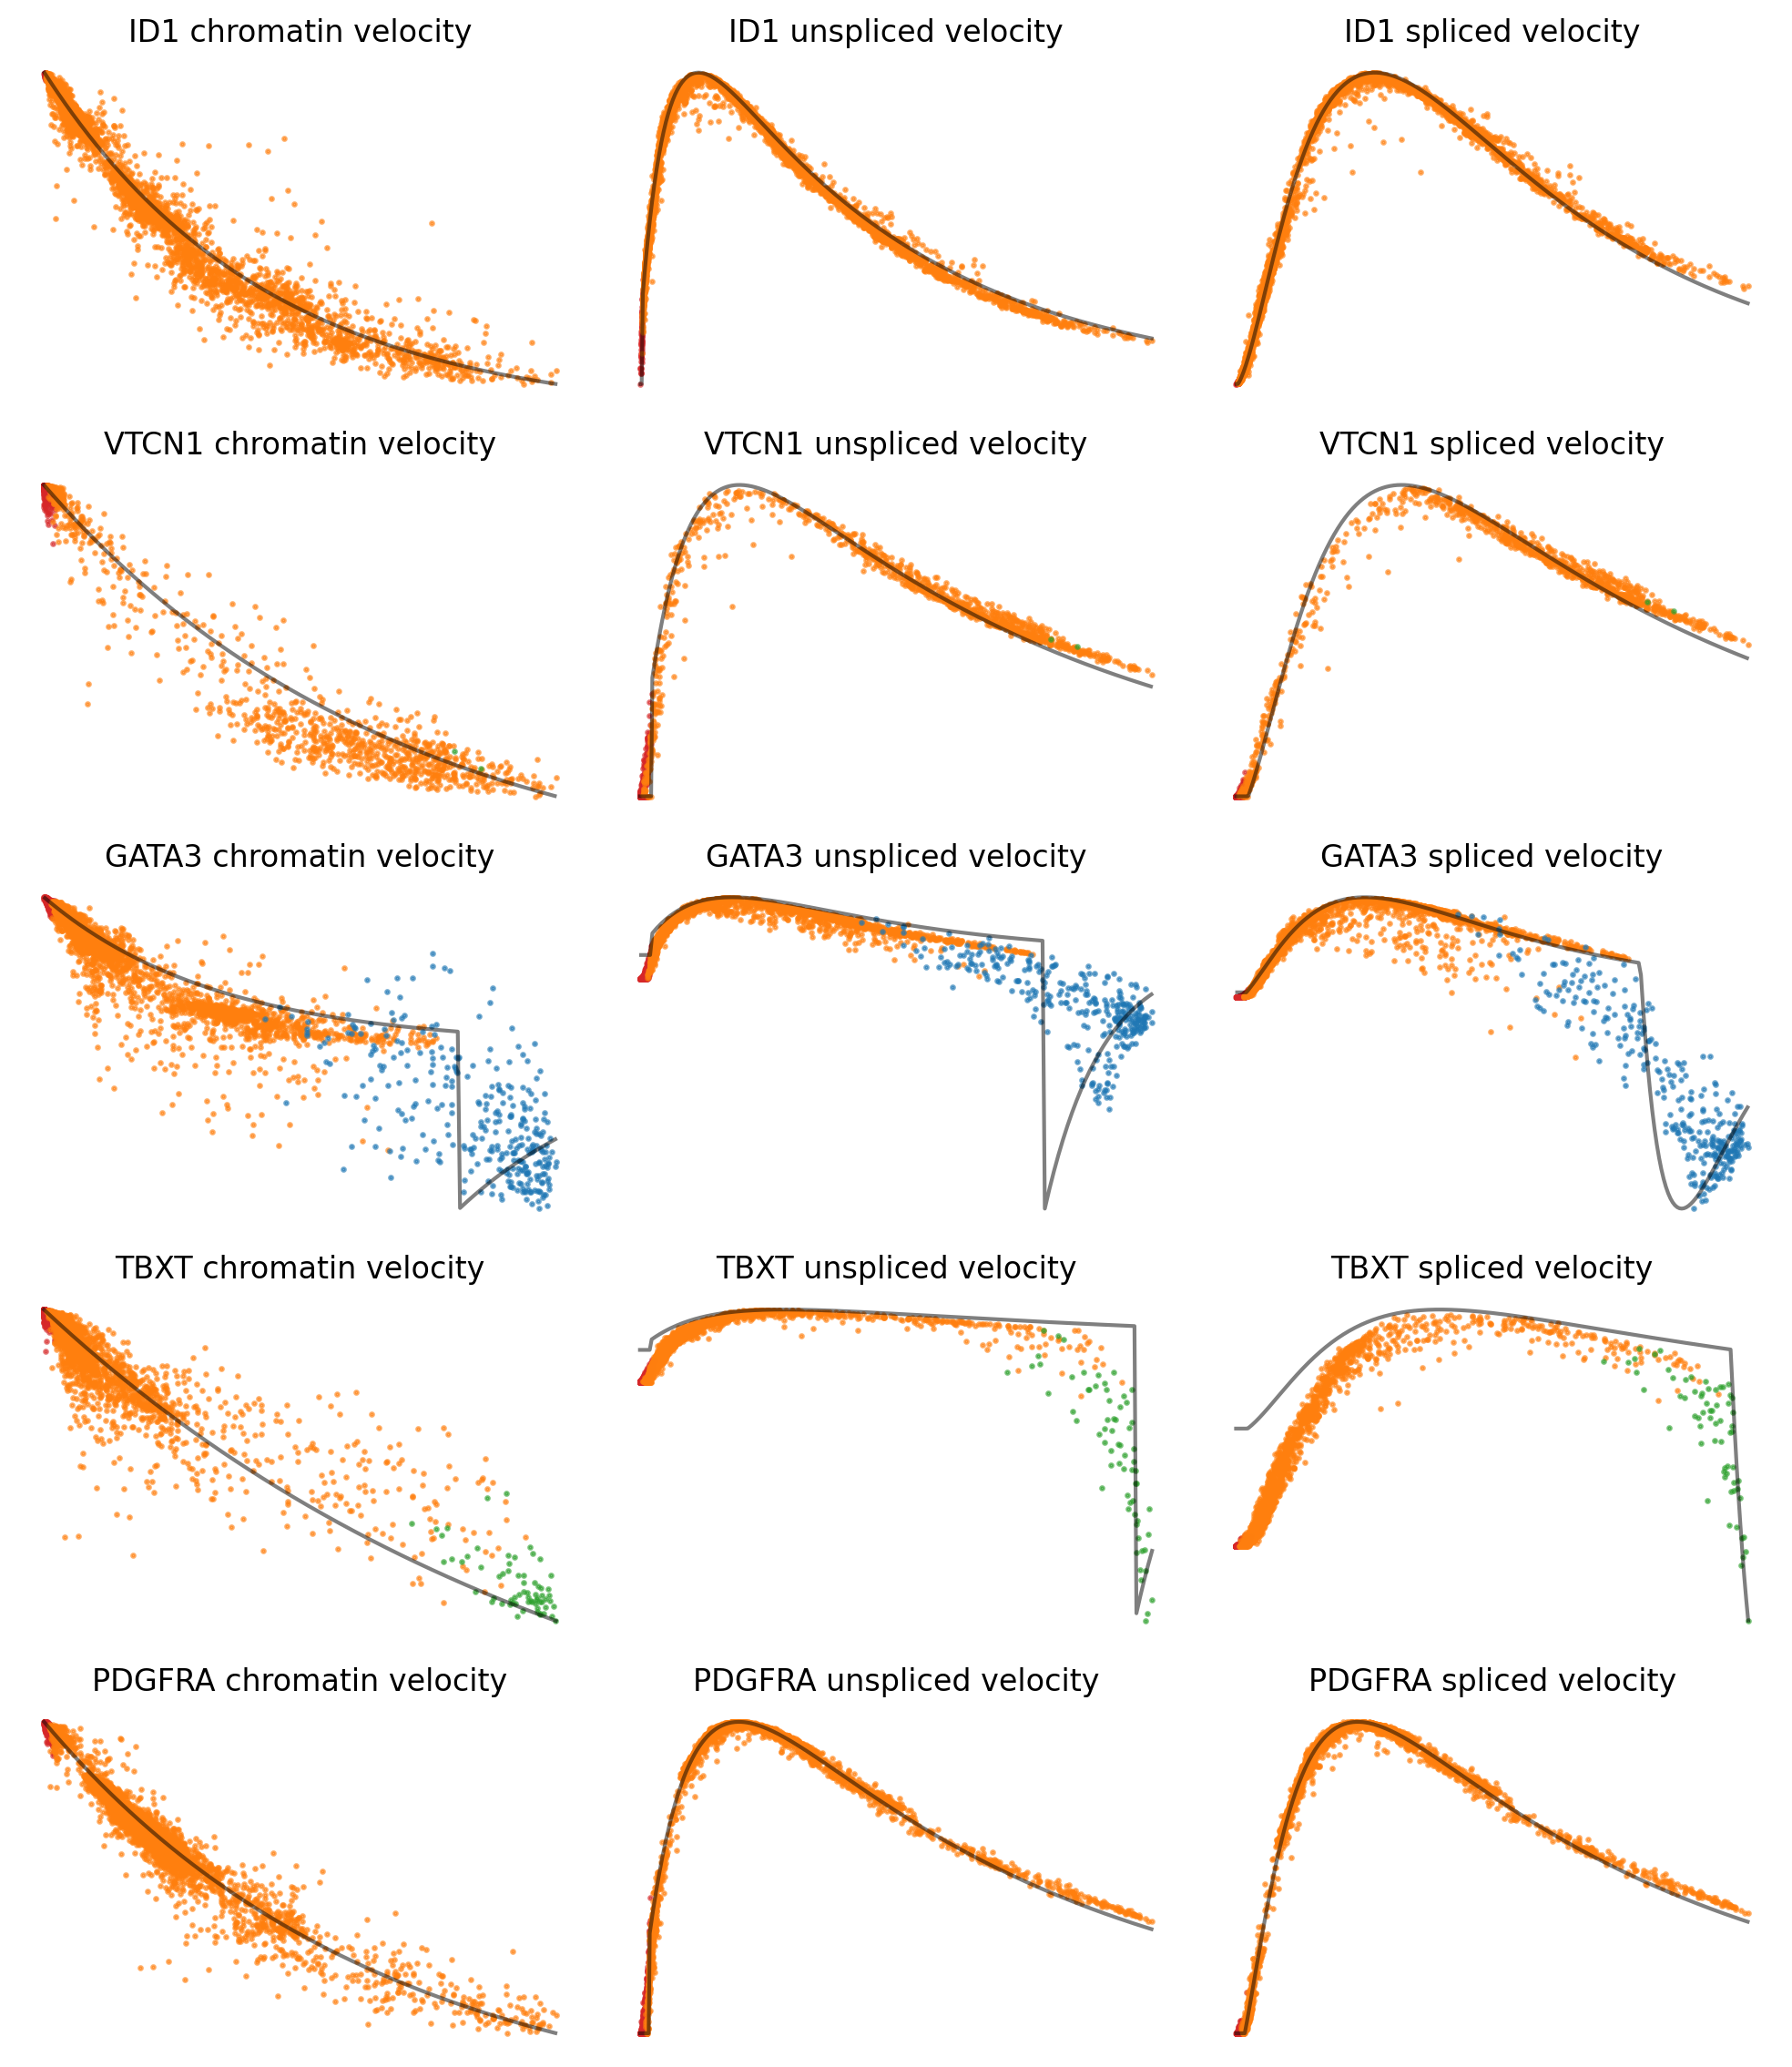

In [96]:
# Velocity by gene time, colored by the four potential states.
# The solid black curve indicates anchors.
mv.dynamic_plot(adata_result, gene_list, color_by='state', by='velocity', axis_on=False, frame_on=False,
              )

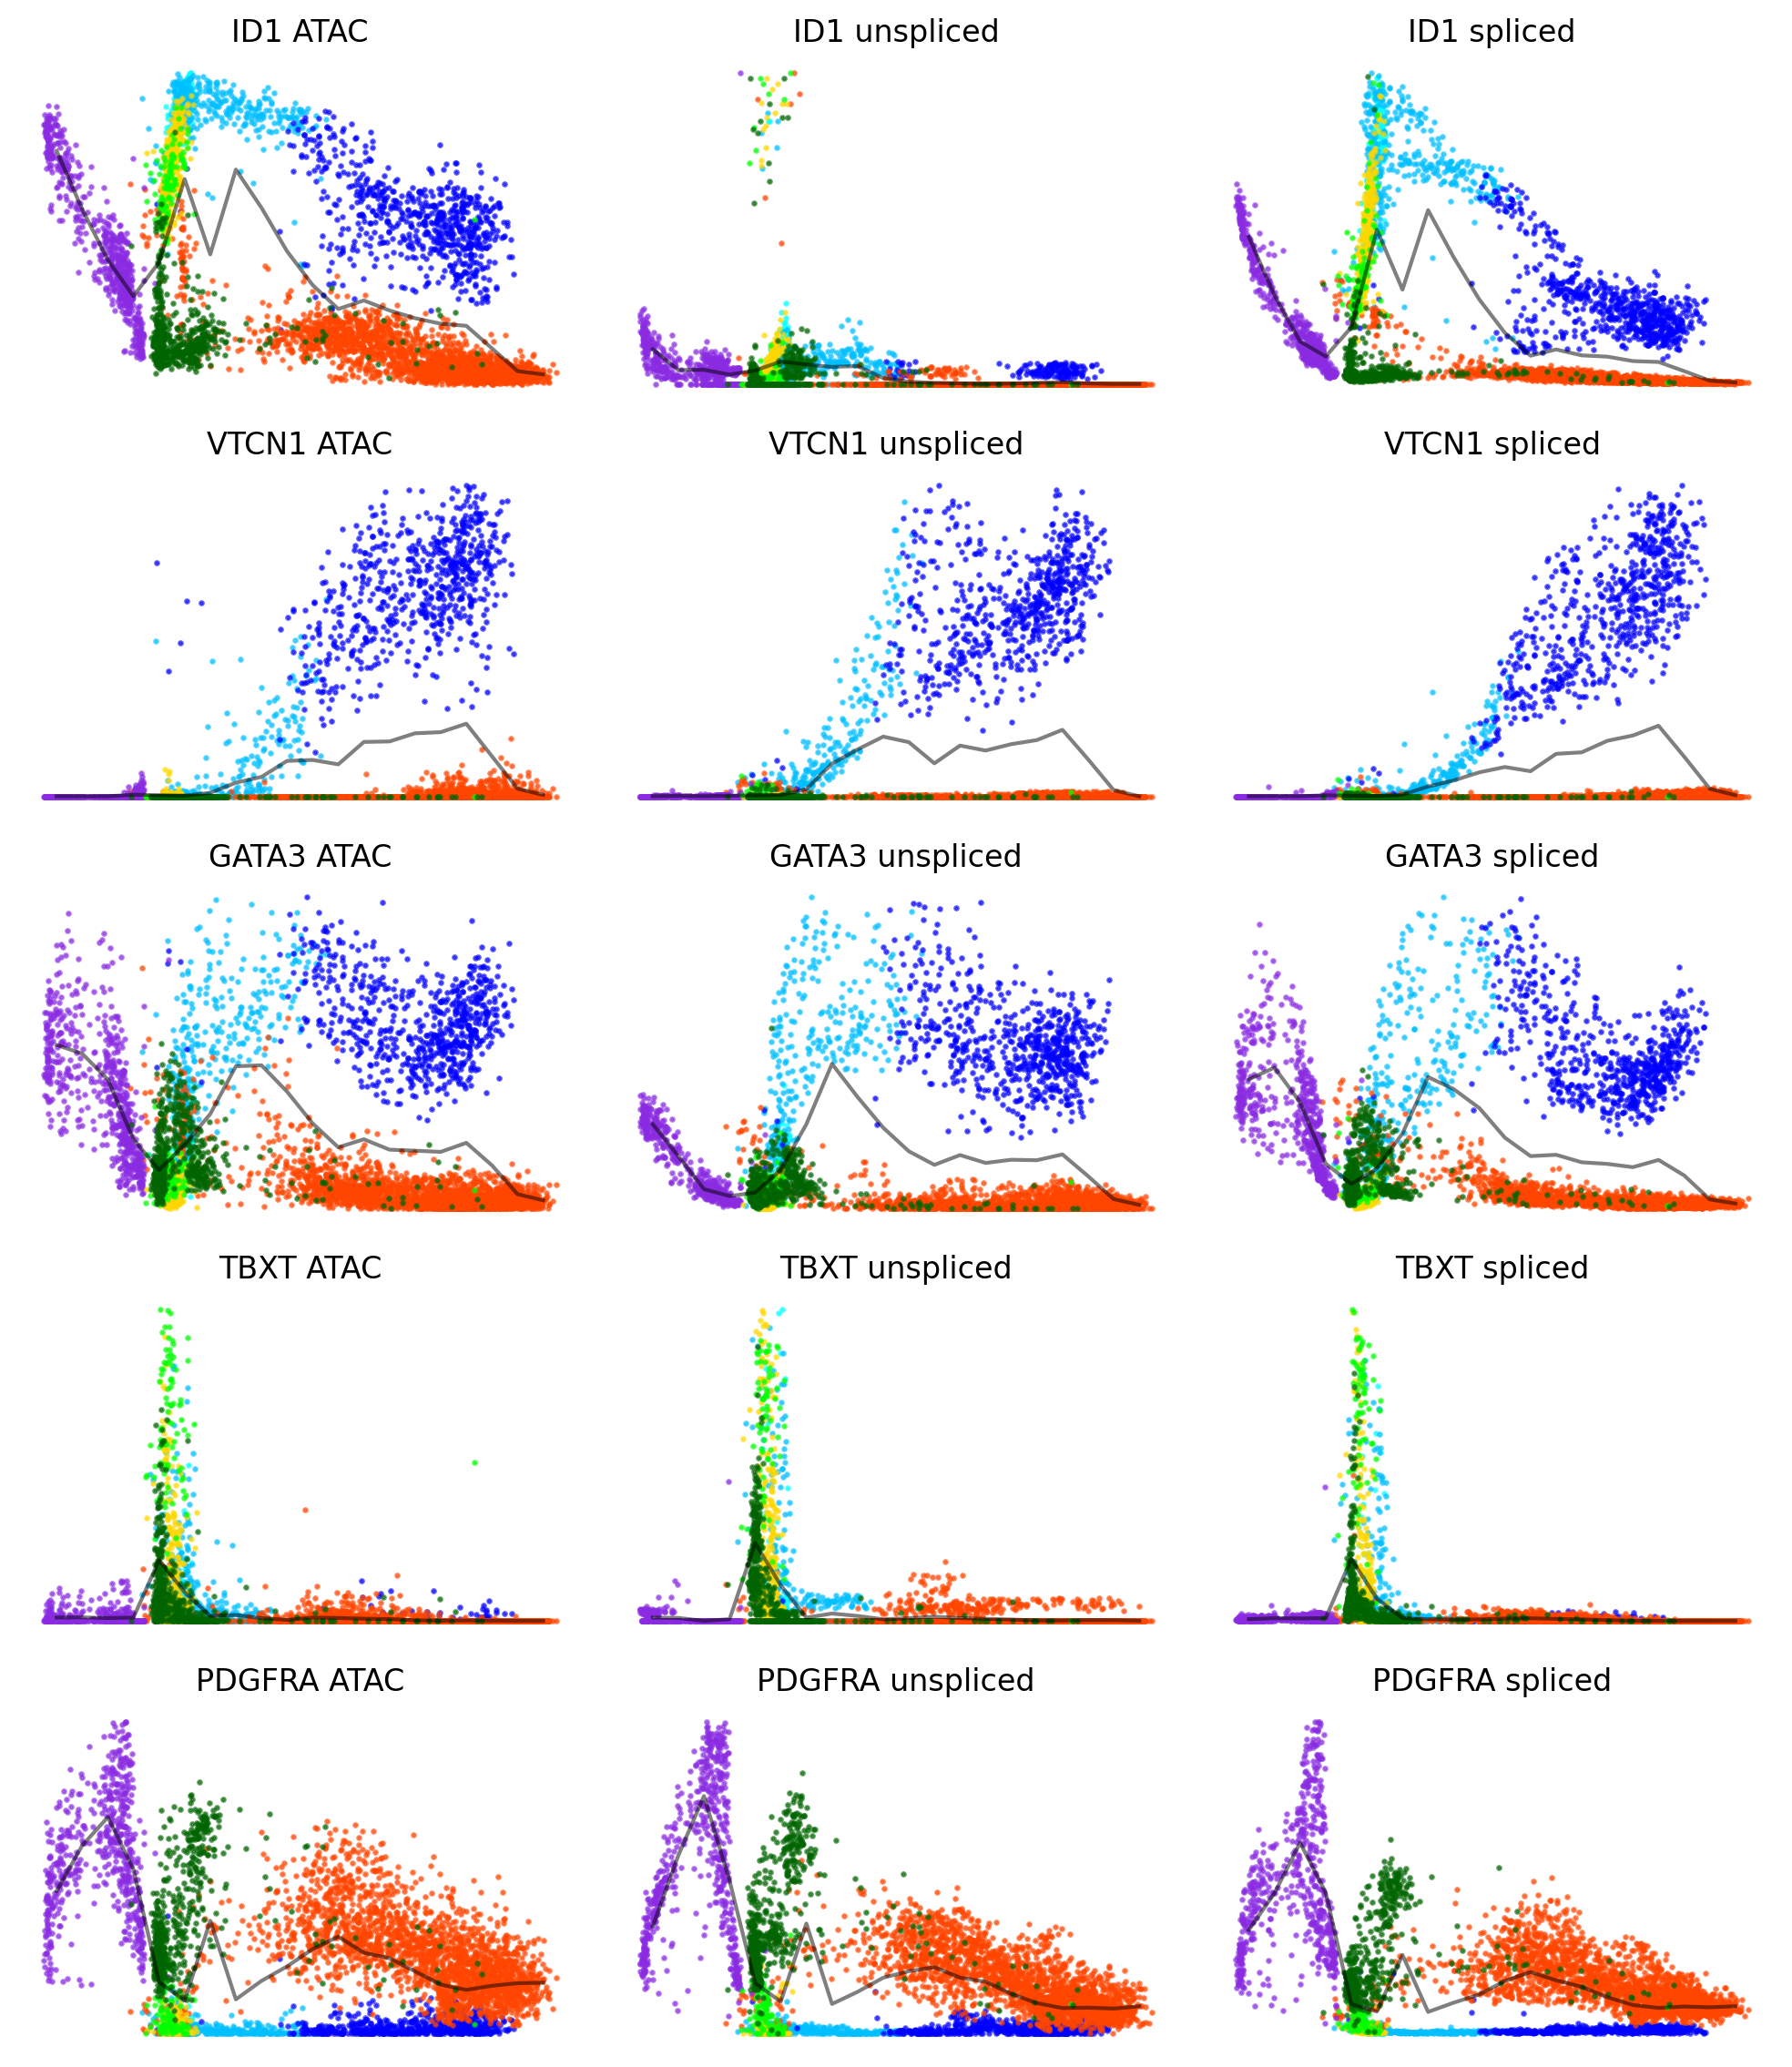

In [99]:
# Accessibility/expression by global latent time, colored by cell type assignments.
# The solid black curve indicates the mean.
mv.dynamic_plot(adata_result, gene_list, color_by='cell_assignment', gene_time=False, axis_on=False, frame_on=False,
              )

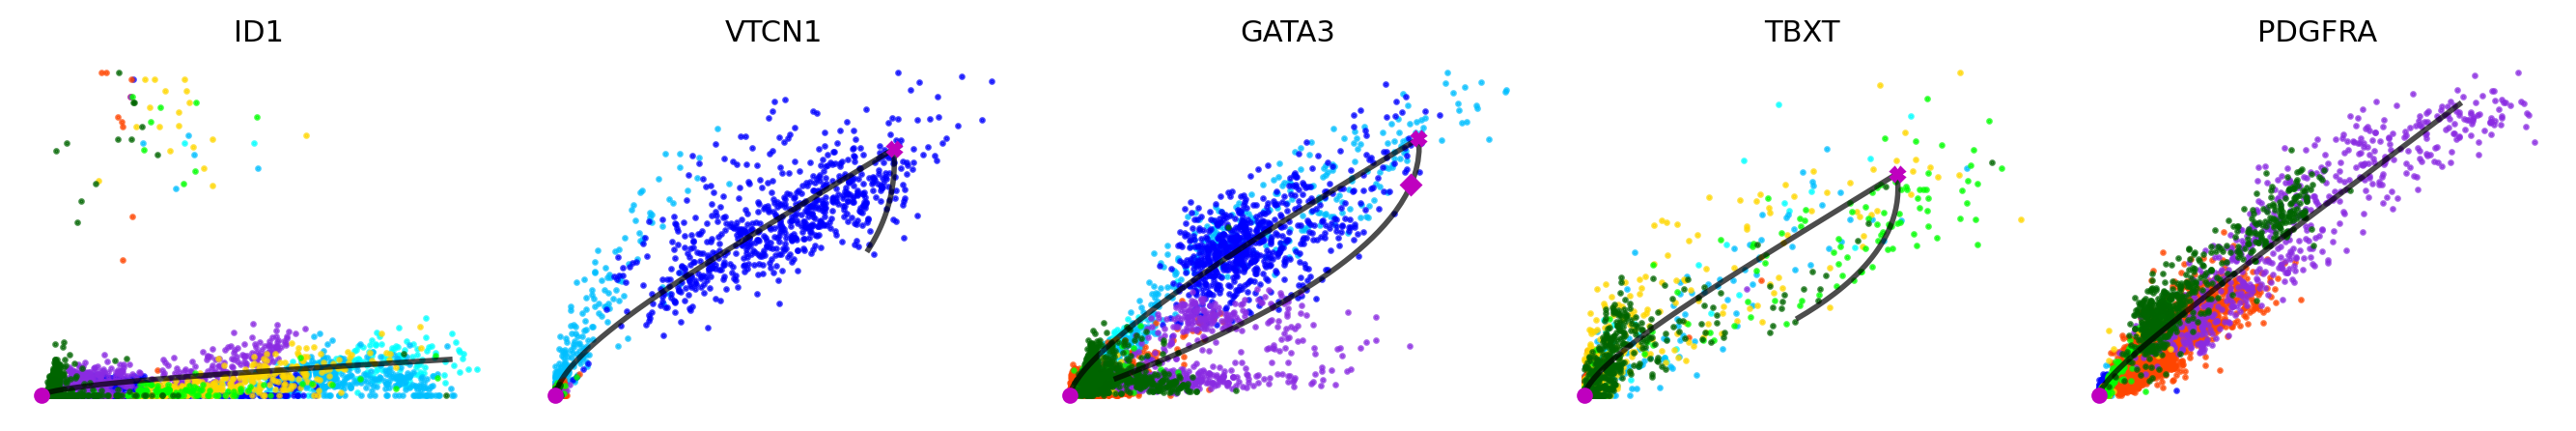

In [100]:
# Unspliced-spliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by='cell_assignment', by='us', axis_on=False, frame_on=False,
               )

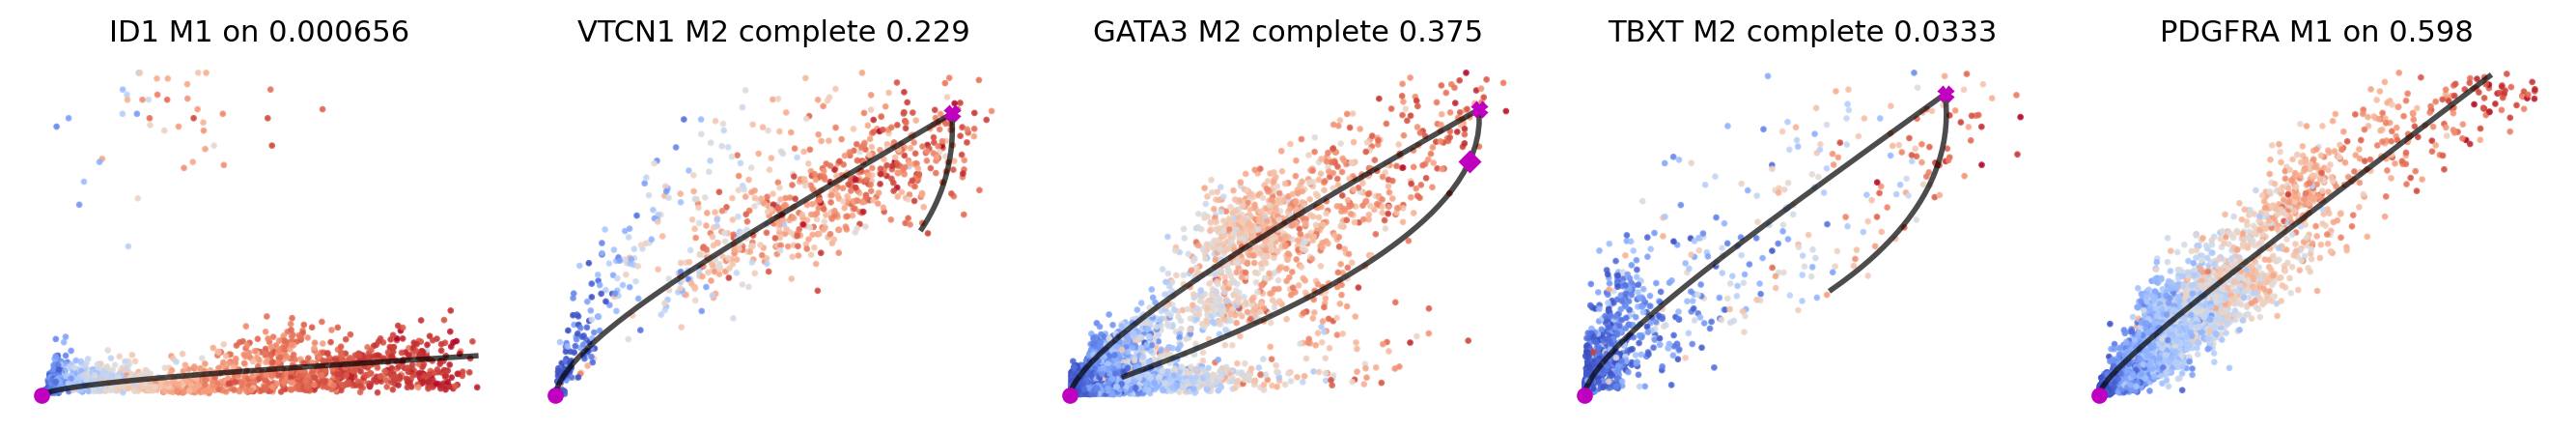

In [101]:
# Unspliced-spliced phase portraits, colored by log chromatin accessibility.
# title_more_info shows more information in each subplot title: model, direction, and likelihood.
mv.scatter_plot(adata_result, gene_list, color_by='c', by='us', cmap='coolwarm', 
                title_more_info=True, axis_on=False, frame_on=False)

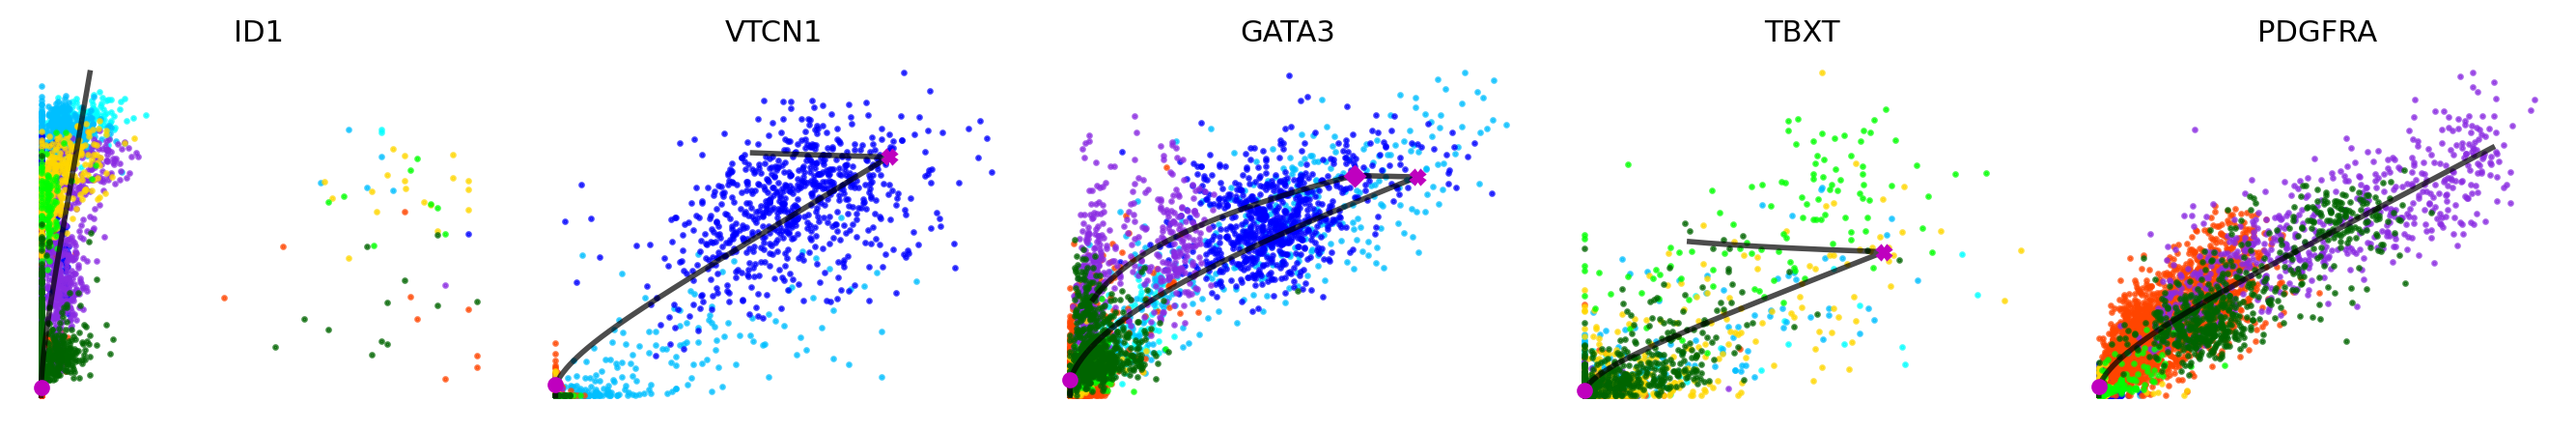

In [102]:
# Chromatin-unspliced phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by='cell_assignment', by='cu', axis_on=False, frame_on=False)

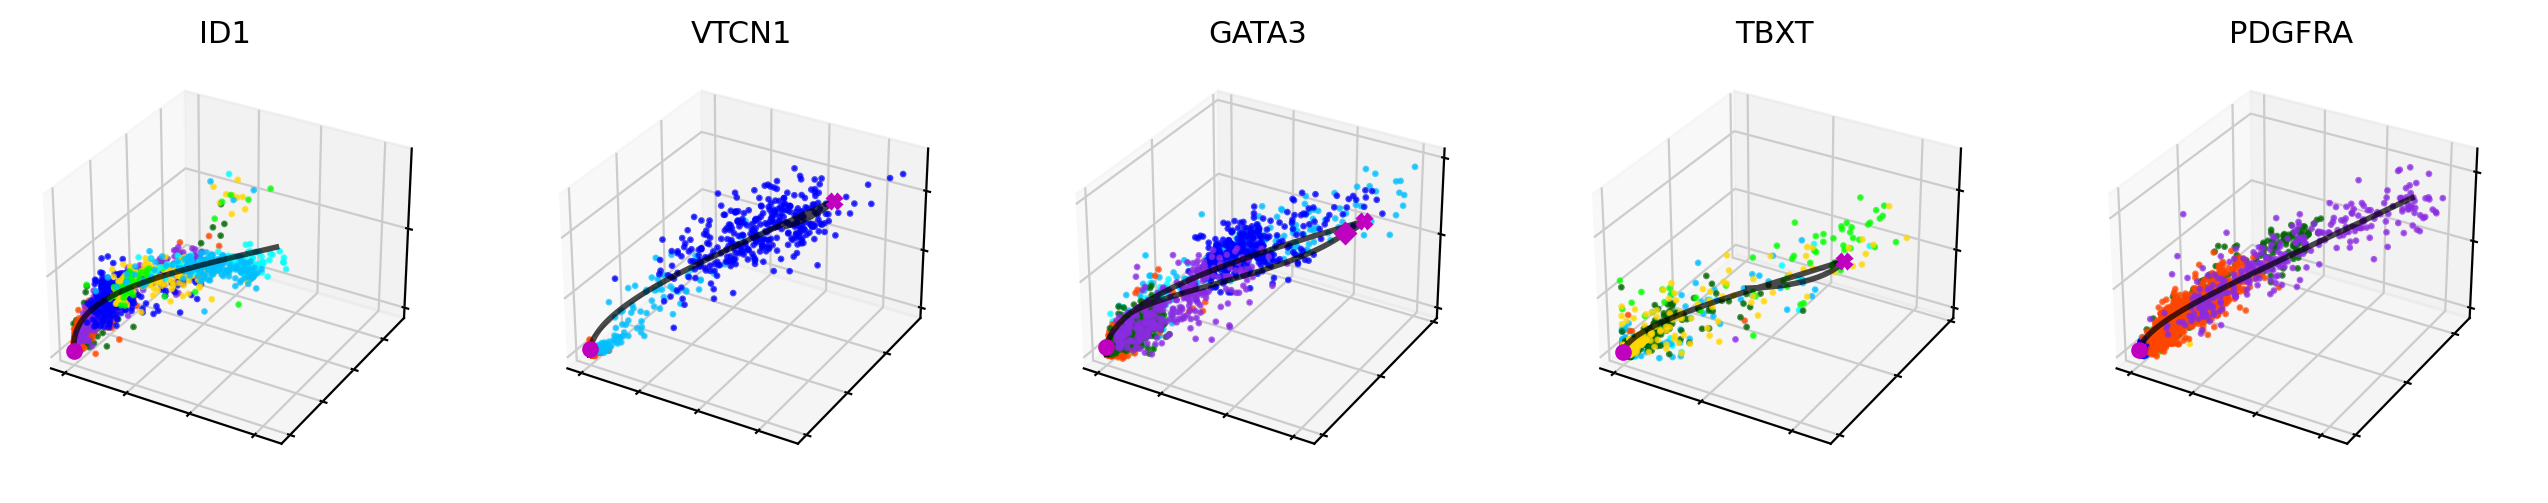

In [103]:
# 3D phase portraits, colored by celltype.
mv.scatter_plot(adata_result, gene_list, color_by='cell_assignment', by='cus', axis_on=False, downsample=2)

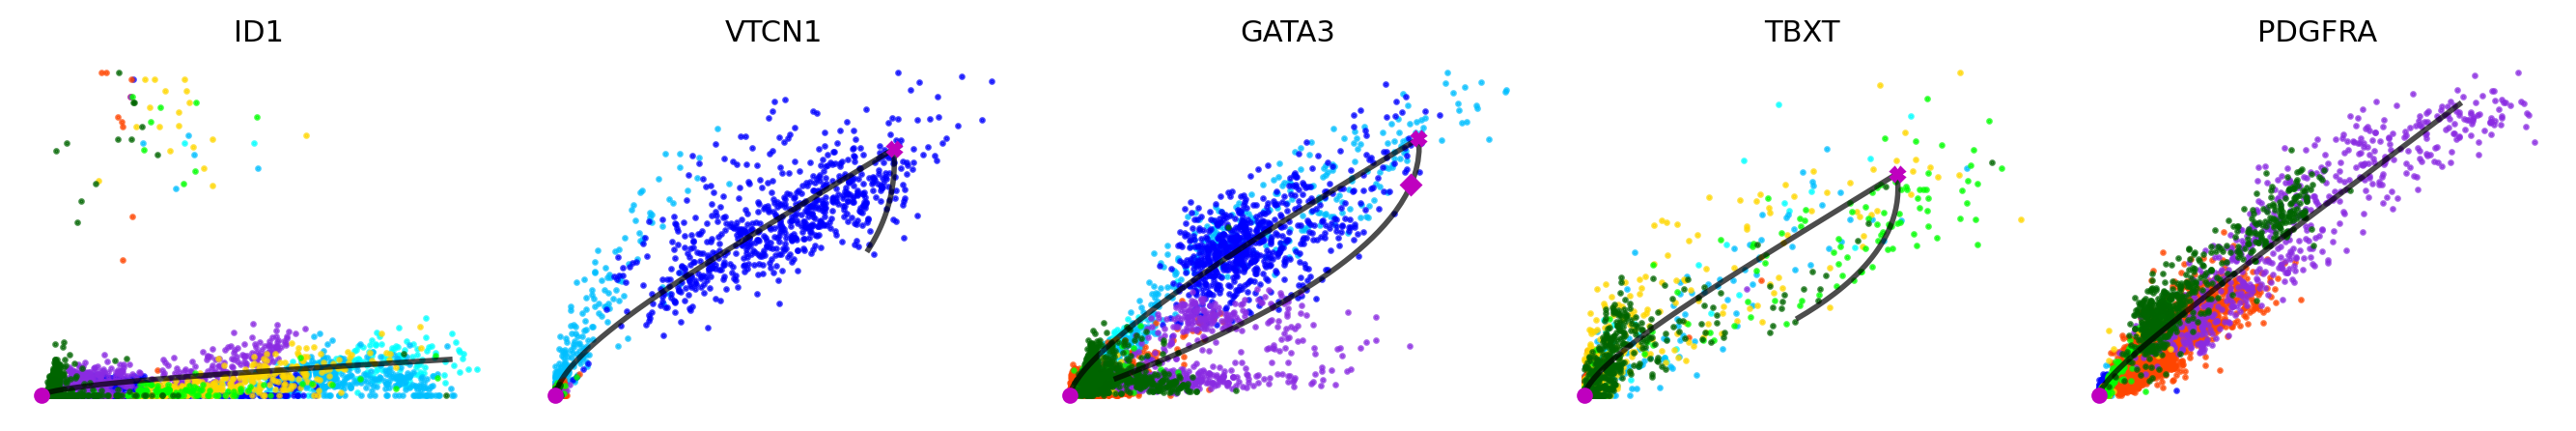

In [104]:
mv.scatter_plot(adata_result, gene_list, color_by='cell_assignment', by='us', axis_on=False, frame_on=False)

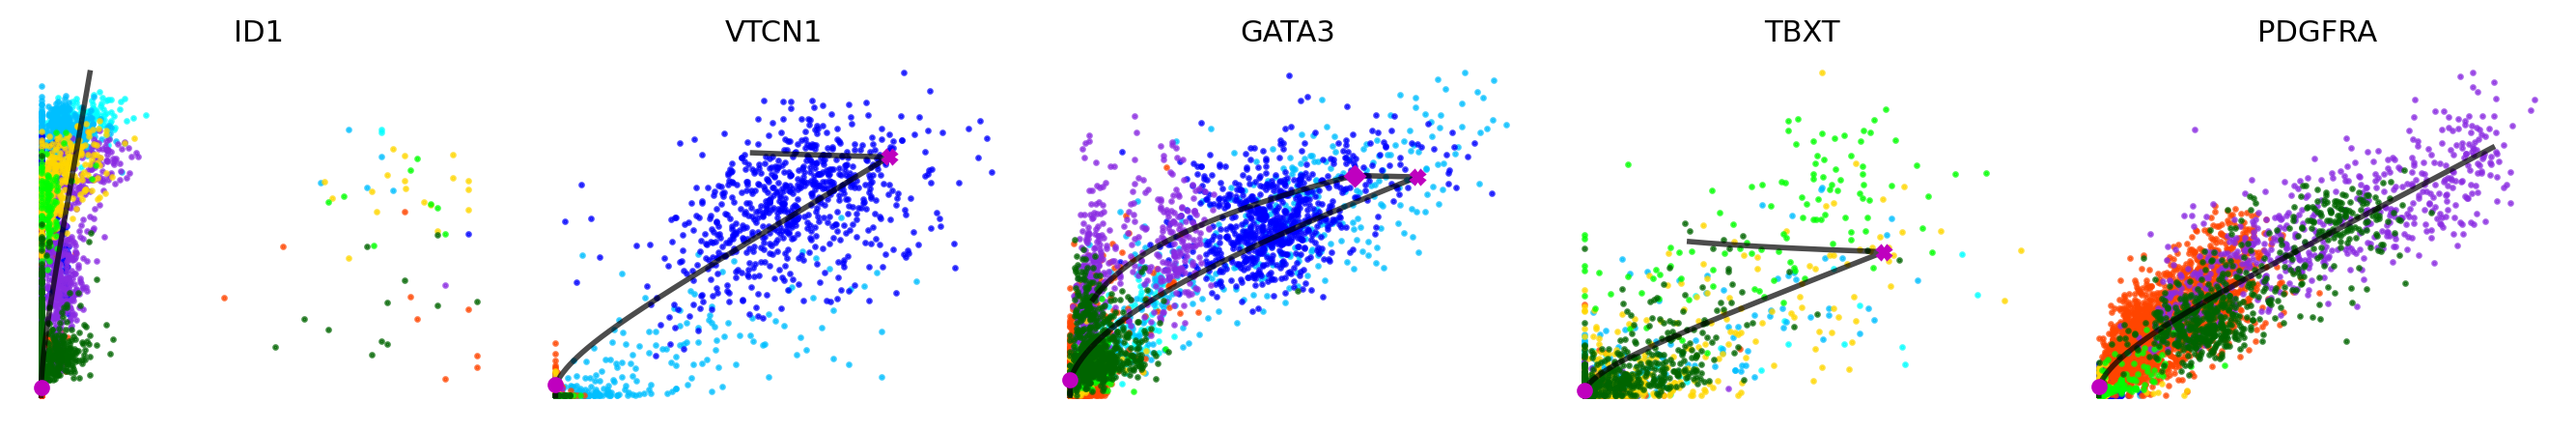

In [105]:
mv.scatter_plot(adata_result, gene_list, color_by='cell_assignment', by='cu', axis_on=False, frame_on=False)

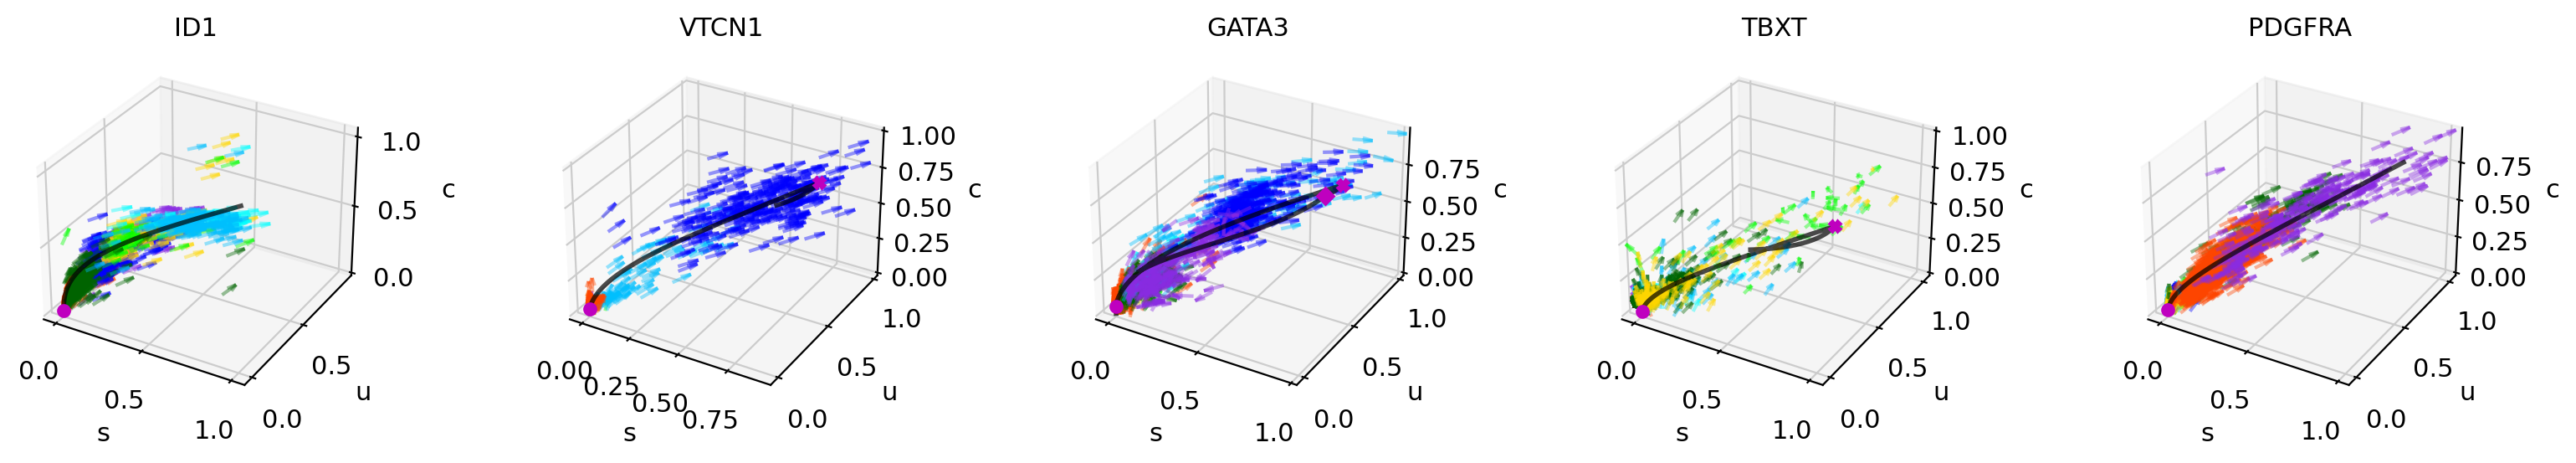

In [106]:
mv.scatter_plot(adata_result, gene_list, color_by='cell_assignment', by='cus', downsample=3, velocity_arrows=True)

In [107]:
adata_result.write('adata_result.h5ad')

In [108]:
adata_result.write_csvs('adata_results')

writing .csv files to adata_results
